# Grover's Algorithm

## Introduction

Grover’s algorithm is a quantum search algorithm which can be used to search through an unstructured space. It is able to provide a quadratic speedup over the best classical algorithms. The reason for the popularity of the Grover’s algorithm is due to the importance searching has had over the last century to resolve various issues. Some of the applications of the Grover’s algorithm include that they can provide statistical information such as minimal, mean, median from an unordered dataset much faster than a classical algorithm. It can be used to speed up several problems and along with this the time it takes to search for a key can be drastically reduced using this algorithm.

## Components

The Components Used As Part Of Grover’s Algorithm:

- The Oracle: Depending on the problem, the oracle function varies. From the output that we receive after the application of the Hadamard gate, we see that each state has the same probability of being measured. Once they provide the state that we want to search for, the Oracle function will invert the amplitude (multiply with -1) the state which we are searching for.


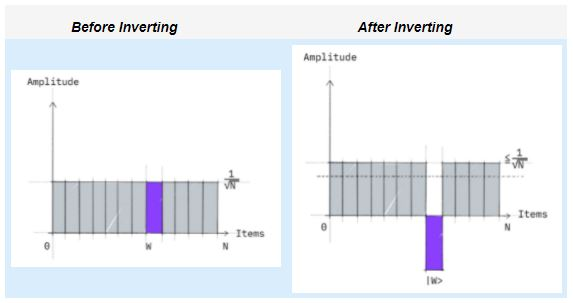

- The Diffuser: Once we invert the amplitude of the target state, we then amplify this state using the amplification operator. We do this on measurement, this state has the most probability of getting selected. Applying this operator after the oracle will move the resultant vector closer to our target state. Hence the more we apply both operators, the closer we move towards the target and the probability of a right answer also increases. We increase its amplitude and at  the same time shrink the amplitude of all other states.


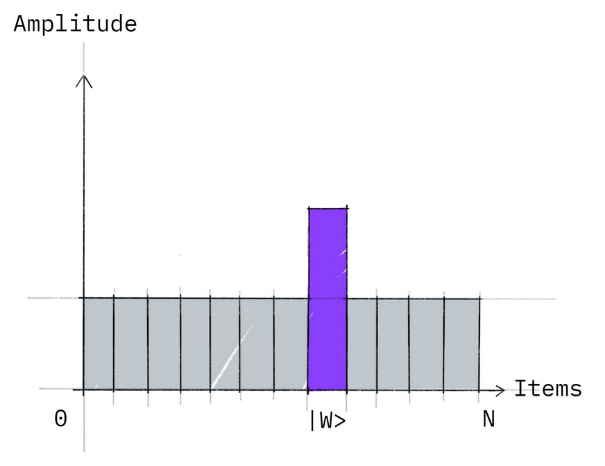 

## Complexity

Through experiments it will be found that doing this algorithm O(sqrt(n)) times is enough to obtain the right answer, hence it provides a quadratic speedup over the best known classical algorithm to search in an unstructured space which takes O(n) time.

For our initial work, we started by implementing Grover's algorithm on a search space of 4 elements. Once we were able to successfully implement this on Amazon Braket, we expanded our search space to 8 elements. We continued testing the capabilities of the system by then testing in on a search space of 16 elements where we prepared 1000 qubits identically and tested the number of times the searched space was returned.



## Circuit Diagram

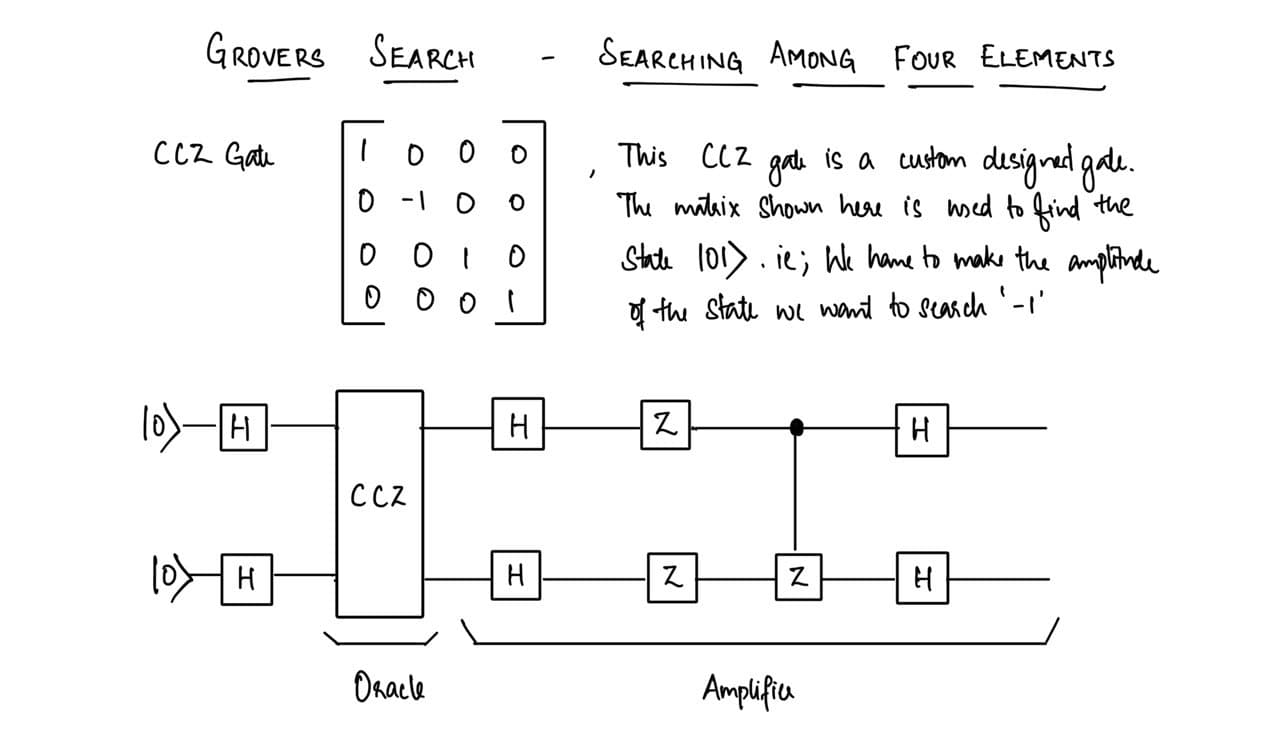

## Code

### Importing Libraries

In [10]:
import boto3
from braket.circuits import Circuit
from braket.aws import AwsDevice
import matplotlib.pyplot as plt
from braket.devices import LocalSimulator
import numpy as np

In [11]:
aws_account_id = boto3.client("sts").get_caller_identity()["Account"]
device = LocalSimulator()
s3_folder = (f"amazon-braket-1c440ad1b4a7","Simulator")


## Implementing Search on a Classical System

In [12]:
elements = [1,2,3,4,5,6,7,8,9]


to_find=12
i=0
flag=0
for i in range(len(elements)): 
    if(to_find == elements[i]):
        flag=1
        break

if( flag == 0 ):
    print('Element Not Found')
else:
    print('Element Found At Index',i)

Element Not Found


## Implementing Search on a Quantum System

### Oracle Operator

In [13]:
## If the Element to Find is 01

temp=[]

for i in range(4):
    temp.append([])
    for j in range(4):
        
        if(i == j):
            if(i == 1):
                temp[i].append(-1.0)
            else:
                temp[i].append(1.0)
        else:
            temp[i].append(0.0)

cz_matrix=np.array(temp)
grover = Circuit()

grover.h([0,1])
# grover.cz(0,1)

grover.unitary(matrix=cz_matrix, targets=[0,1])

print(grover)


T  : |0|1|
          
q0 : -H-U-
        | 
q1 : -H-U-

T  : |0|1|


### Adding the Amplification Operator To the Circuit

In [5]:
grover.h([0,1])
grover.z([0,1])
grover.cz(0,1)
grover.h([0,1])


print(grover)

T  : |0|1|2|3|4|5|
                  
q0 : -H-U-H-Z-C-H-
        |     |   
q1 : -H-U-H-Z-Z-H-

T  : |0|1|2|3|4|5|


## Run the Circuit To Verify

In [6]:
counts = device.run(grover, shots = 1000).result().measurement_counts
print(counts)

Counter({'01': 1000})


## Plotting Results


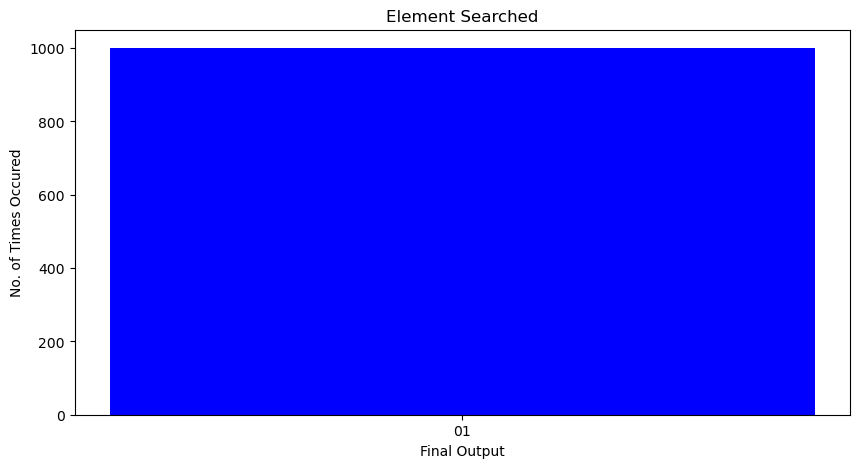

In [7]:
solutions=[]
total_times=[]

for key, value in counts.items():
    if(key[:4] not in solutions):
        solutions.append(key[:4])
        total_times.append(0)
    total_times[solutions.index(key[:4])] += value
    
    

  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(solutions, total_times, color ='blue', width = 0.4)
 
plt.xlabel("Final Output")
plt.ylabel("No. of Times Occured")
plt.title("Element Searched")
plt.show()